# Task 2: Genre Classification Data (Descriptors and Spectograms)

Tito Scutari

<a href="https://colab.research.google.com/github/inspektral/asmc-genre-classification/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [101]:
features_3_sec = pd.read_csv('data/features_3_sec.csv')
features_30_sec = pd.read_csv('data/features_30_sec.csv')

In [102]:
USED_SET = features_3_sec
USED_SET = USED_SET.drop(['filename', 'length'], axis=1)

train, test = train_test_split(USED_SET, test_size=0.2)

In [103]:
def normalize_feature_set(features):
    scaler = StandardScaler()

    scaler.fit(features)
    scaled_features = scaler.transform(features)

    scaled_df = pd.DataFrame(scaled_features)

    return scaled_df


X_test = test.drop('label', axis=1)
X_test = normalize_feature_set(X_test)
y_test = test['label']

X_train = train.drop('label', axis=1)
X_train = normalize_feature_set(X_train)
y_train = train['label']

labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)

display(X_train)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.343813,1.057671,1.142444,0.344410,0.486125,0.197189,1.118408,0.939267,0.762285,1.203597,...,-1.065027,-0.308643,0.361313,-0.185066,0.187494,0.156462,0.670771,0.531694,0.056488,0.957531
1,-0.040734,-0.041588,1.037314,-0.025645,-1.005413,0.579794,-0.879899,2.243140,-0.932283,1.088932,...,-0.220957,-0.812056,-1.007714,-0.059780,-0.618173,0.145126,-0.190195,-0.604241,-0.021955,-0.708969
2,-0.111783,0.347363,0.123822,-0.120781,-0.486924,0.281100,0.417034,2.504489,-0.250818,2.303661,...,0.301536,0.076460,0.574989,-0.425543,0.241298,-0.680362,2.164812,-0.406367,0.780932,-0.234906
3,-1.623595,1.325280,1.983510,6.466752,-0.643043,0.034976,-0.979169,0.715170,-0.653437,0.615885,...,-0.446936,0.750733,-1.017639,1.184872,-1.580768,0.580906,-0.145135,-0.169236,-1.528300,-0.008725
4,2.287549,-3.627315,1.272663,-0.556203,1.222840,-0.747040,0.196366,-0.689163,0.675196,-0.798466,...,1.235851,-0.717684,-0.224150,-0.986987,0.695257,-0.833316,-0.658386,-0.842615,1.319764,-0.652520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,0.547679,1.022211,-1.059492,-0.614211,0.901857,-0.365309,0.764223,0.083953,0.798970,-0.309115,...,0.813817,0.309594,1.795666,-0.585962,0.517027,-0.089055,0.364503,-0.076796,1.106038,-0.260115
7988,0.960121,-0.925989,-0.139065,-0.348093,-0.079135,-0.743912,-0.409419,-0.513563,-0.161545,-0.678526,...,0.792024,-0.816219,-0.492041,-0.682812,-0.101579,-0.356115,0.159192,-0.555902,1.755242,0.179969
7989,1.001841,0.566534,1.548729,4.851469,1.201019,1.782811,1.503593,0.557414,1.347058,1.192649,...,0.027595,-0.363380,0.623281,-0.423424,-0.480010,-0.278384,0.070960,-0.007935,-0.410114,-0.167796
7990,0.928738,-0.812937,-0.845184,-0.608075,2.068153,0.954957,1.901053,-0.873827,2.002559,-0.483890,...,-0.757160,-0.444147,0.468344,-0.648823,-0.061354,-0.549738,-0.561849,-0.543096,-0.845173,-0.591349


In [104]:
selector = SelectKBest(f_classif, k=30)
selector.fit(X_train, y_train)

X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [105]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
print(f'MLP Classifier accuracy: {mlp_accuracy}')

MLP Classifier accuracy: 0.8248248248248248


In [106]:
k_values = range(1, 21)
best_accuracy = 0
best_k = 1

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, predictions)

print(f'kNN Accuracy: {knn_accuracy} with k={best_k}')

kNN Accuracy: 0.8878878878878879 with k=1


In [107]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM accuracy: {svm_accuracy}')

SVM accuracy: 0.6946946946946947


In [108]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest: {rf_accuracy}')

Random Forest: 0.8323323323323323


In [109]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, predictions)
print(lr_accuracy)

0.6591591591591591


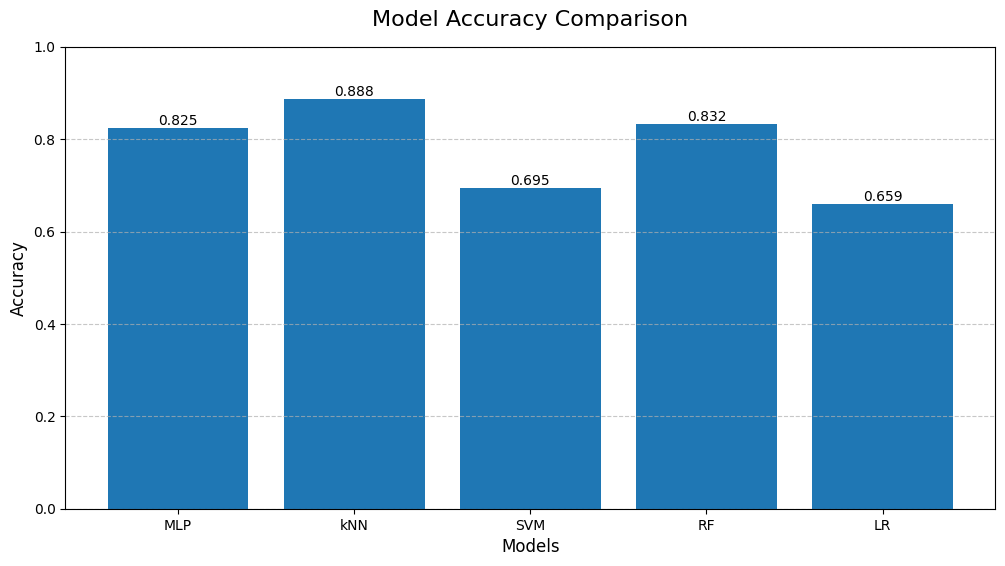

In [ ]:
plt.figure(figsize=(12, 6))
accuracies = [mlp_accuracy, knn_accuracy, svm_accuracy, rf_accuracy, lr_accuracy]
models = ['MLP', 'kNN', 'SVM', 'RF', 'LR']

bars = plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison', fontsize=16, pad=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.show()

# Considerations

kNN is the best classifier in this case, I think that that means that the feature space is not linearly separable, but the selection of samples is quite good.